# Identificar fronteras no lineales

In [70]:
from sklearn.datasets.samples_generator import make_circles

In [71]:
X , Y = make_circles(100 , factor = .1 , noise = .1)

In [95]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.svm import SVC
from sklearn.datasets import make_blobs


In [96]:
def plt_svc(model, ax=None, plot_support=True):
    """Plot de la función de decisión para una clasificación en 2D con SVC"""
    if ax is None:
        ax = plt.gca()
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()
    
    ##Generamos la parrila de puntos para evaluar el modelo
    xx = np.linspace(xlim[0], xlim[1], 30)
    yy = np.linspace(ylim[0], ylim[1], 30)
    Y, X = np.meshgrid(yy,xx)
    
    xy = np.vstack([X.ravel(), Y.ravel()]).T
    P = model.decision_function(xy).reshape(X.shape)

    
    ##Representamos las fronteras y los márgenes del SVC
    ax.contour(X,Y,P, colors="k", levels=[-1,0,1], alpha = 0.5, linestyles=["--", "-", "--"])
    
    print(model.support_vectors_)
    
    if plot_support:
        ax.scatter(model.support_vectors_[:,0], 
                   model.support_vectors_[:,1], 
                   s=300, linewidth=1, facecolors = "blue");
    
    
    ax.set_xlim(xlim)
    ax.set_ylim(ylim)

In [92]:
def plot_svm(N=10, ax=None):
    X, Y = make_blobs(n_samples=200, centers=2, random_state=0, cluster_std=0.6)
    
    X = X[:N]
    Y = Y[:N]
    model = SVC(kernel="linear", C=1E10)
    model.fit(X,Y)
    
    ax = ax or plt.gca()
    ax.scatter(X[:,0], X[:,1], c=Y, s = 50, cmap="autumn")
    ax.set_xlim(-1,4)
    ax.set_ylim(-1,6)
    plt_svc(model, ax)
    

    


[[ 0.56974626 -0.8292454 ]
 [ 0.5060145  -0.86273625]
 [-0.70131604 -0.7163374 ]
 [ 0.36456825  1.09144365]
 [ 0.84388433  0.27298242]
 [-0.96139562  0.6177502 ]
 [-0.40977517 -0.99940194]
 [ 0.57039777  0.92297815]
 [ 0.02744285  0.88159696]
 [-0.70410644  0.6276932 ]
 [ 0.70983836  0.36197509]
 [-0.56562743 -0.88892613]
 [ 0.9544874  -0.35717151]
 [ 0.05588326 -1.00767307]
 [ 0.27437372 -0.94847375]
 [-0.12393073 -0.84934279]
 [ 0.94841276 -0.32815747]
 [ 0.61281359  0.85738791]
 [ 0.63958118  0.52530598]
 [-0.79515078 -0.65861645]
 [ 0.75490156 -0.61559766]
 [-0.29334273  0.84035154]
 [-0.46534515  0.99588122]
 [-0.94441603  0.27732602]
 [ 0.66499617  0.58003813]
 [ 0.79230597 -0.75772295]
 [-0.96675729  0.48007834]
 [ 0.90058417  0.16100854]
 [ 0.08192577  1.06780068]
 [-1.10700385  0.16502443]
 [-0.39863831 -0.93645936]
 [ 1.07144802  0.14121721]
 [-1.09316782  0.22088244]
 [-0.43571298 -0.71452233]
 [ 0.48931392 -0.90036897]
 [ 0.00774324  1.0506951 ]
 [ 0.58052448  0.67294292]
 

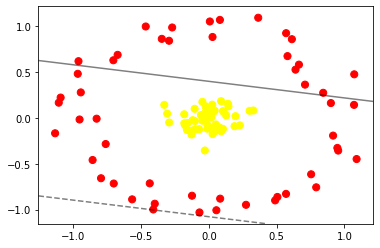

In [75]:
plt.scatter(X[:,0] , X[:,1] ,c=Y , s=50 ,cmap="autumn" )
plt_svc(SVC(kernel ="linear").fit(X,Y), plot_support=False)

In [76]:
r = np.exp(-(X**2).sum(1))

In [77]:
r

array([0.36339724, 0.98380217, 0.36774537, 0.36605069, 0.26602653,
       0.99316472, 0.98818314, 0.90787648, 0.99942045, 0.45536309,
       0.27092944, 0.31138664, 0.3081273 , 0.45933922, 0.9967829 ,
       0.41075242, 0.99082377, 0.52999036, 0.99537262, 0.32951808,
       0.35394361, 0.99915086, 0.89236909, 0.97414663, 0.91569625,
       0.36112615, 0.37723634, 0.99394381, 0.47867089, 0.97902869,
       0.98521902, 0.36524968, 0.98405   , 0.88017588, 0.97744351,
       0.96843019, 0.32934333, 0.95747548, 0.50408496, 0.34436939,
       0.38719113, 0.99958403, 0.45282902, 0.29869703, 0.95193198,
       0.37952631, 0.97269736, 0.45901879, 0.30062464, 0.31189307,
       0.98596788, 0.98393818, 0.43301817, 0.31761665, 0.28573497,
       0.95666566, 0.96349546, 0.99580285, 0.96799887, 0.95962076,
       0.35491795, 0.31100597, 0.28828522, 0.49639269, 0.99958701,
       0.34990542, 0.95766459, 0.9796588 , 0.33153558, 0.45390796,
       0.94252886, 0.99707469, 0.3968713 , 0.41557451, 0.24889

In [78]:
from mpl_toolkits import mplot3d

In [79]:
def plot_3d(elev=30 , azim = 30 , X=X ,Y=Y ,r=r):
    ax = plt.subplot(projection="3d")
    ax.scatter(X[:,0], X[:,1],r , c=Y ,s =50 , cmap= "autumn")
    ax.view_init(elev=elev, azim=azim)
    
    ax.set_xlabel("x[0]")
    ax.set_ylabel("Y[1]")
    ax.set_zlabel("r")

In [80]:
from ipywidgets import interact , fixed
interact

In [81]:
interact(plot_3d , elev=[-90 ,-60,-40,20 ,60, 90] , azim=[-180,-30, 30,180] , X = fixed(X) ,Y = fixed(Y) , r= fixed(r))

interactive(children=(Dropdown(description='elev', options=(-90, -60, -40, 20, 60, 90), value=-90), Dropdown(d…

<function __main__.plot_3d(elev=30, azim=30, X=array([[ 0.56974626, -0.8292454 ],
       [ 0.10490866,  0.07297001],
       [ 0.5060145 , -0.86273625],
       [-0.70131604, -0.7163374 ],
       [ 0.36456825,  1.09144365],
       [-0.0083771 , -0.08239279],
       [-0.10324034, -0.0350523 ],
       [ 0.30120491,  0.07695809],
       [-0.01859155, -0.01529929],
       [ 0.84388433,  0.27298242],
       [-0.96139562,  0.6177502 ],
       [-0.40977517, -0.99940194],
       [ 0.57039777,  0.92297815],
       [ 0.02744285,  0.88159696],
       [-0.04742669, -0.0311928 ],
       [-0.70410644,  0.6276932 ],
       [ 0.001141  , -0.09600669],
       [ 0.70983836,  0.36197509],
       [-0.00288898,  0.06804246],
       [-0.56562743, -0.88892613],
       [ 0.9544874 , -0.35717151],
       [-0.01187364,  0.02661794],
       [ 0.32786589,  0.07987122],
       [-0.10136738, -0.12616695],
       [-0.29238863, -0.05078838],
       [ 0.05588326, -1.00767307],
       [ 0.27437372, -0.94847375],
       [

In [82]:
rbf = SVC(kernel="rbf", C=1E6)
rbf.fit(X,Y)

C:\Users\Tomas\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


SVC(C=1000000.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='rbf', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

[[ 0.70983836  0.36197509]
 [-0.12393073 -0.84934279]
 [-0.29334273  0.84035154]
 [-0.82769465 -0.00935395]
 [ 0.08377136 -0.88128264]
 [ 0.32786589  0.07987122]
 [-0.02915878 -0.35606641]
 [-0.32863681  0.14153736]]


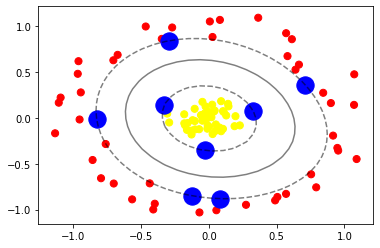

In [83]:
plt.scatter(X[:,0] , X[:,1] , c =Y ,s =50 , cmap="autumn")
plt_svc(rbf)
plt.scatter(rbf.support_vectors_[:,0] ,  rbf.support_vectors_[:,1] , s=300 ,lw=1 , facecolors="none")

In [84]:
## Ajustar los parametros de SVM

In [101]:
X, Y = make_blobs(n_samples=100, centers = 2, random_state=0, cluster_std=1.2)

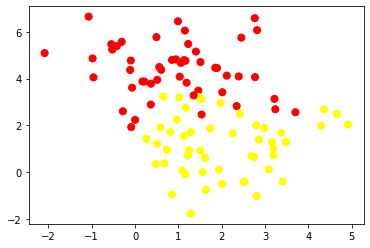

In [103]:
plt.scatter(X[:,0], X[:,1] ,c =Y ,s=50 ,cmap = "autumn")

In [105]:
X, Y = make_blobs(n_samples=100, centers=2, random_state=0, cluster_std=0.8)

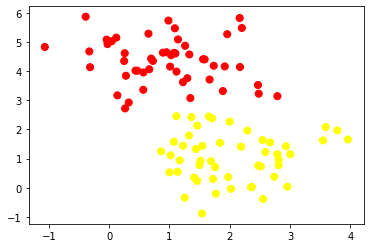

In [107]:
plt.scatter(X[:,0],X[:,1] , c=Y , s=50 ,cmap = "autumn")

[[0.26604148 2.71915015]
 [2.79207378 3.14029479]
 [1.1167688  2.45256061]
 [1.36628697 2.42571562]]
[[0.26604148 2.71915015]
 [2.79207378 3.14029479]
 [2.48279064 3.22558008]
 [0.32575305 2.92276125]
 [1.1167688  2.45256061]
 [1.65684156 2.4412893 ]
 [1.36628697 2.42571562]]


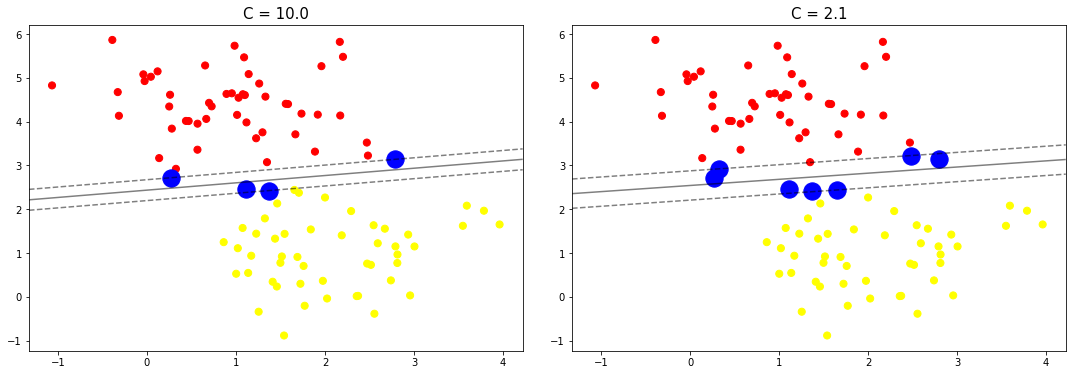

In [113]:
fig, ax = plt.subplots(1,2, figsize =(16,6))
fig.subplots_adjust(left = 0.05 , right= 0.95 , wspace = 0.1)

for ax_i ,C in zip(ax,[10.0 , 2.1]):
    model =SVC(kernel="linear" , C=C)
    model.fit(X,Y)
    ax_i.scatter(X[:,0],X[:,1] , c =Y ,s = 50 , cmap= "autumn")
    plt_svc(model, ax_i)
    ax_i.set_title("C = {0:.1f}".format(C),size = 15)